# DFT

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

% matplotlib inline

### 1. Implement DFT and IDFT using Iteration

In [4]:
def DFT_loop(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    return [sum([x[i]*(Wn**(i*j)) for i in range(N)]) for j in range(N)]

In [5]:
def IDFT_loop(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    return [sum([x[i]*(Wn**(-i*j))/N for i in range(N)]) for j in range(N)]

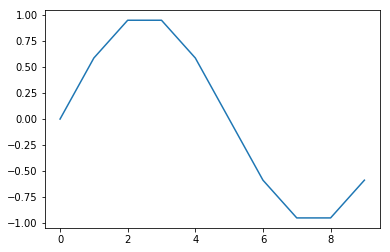

In [6]:
f = 10
N = 10
t = np.linspace(0, 1/f, N+1)[:-1]
x = np.sin(2*np.pi*t*f)

plt.plot(x)

In [7]:
% time
dft_loop = DFT_loop(x)
x_loop = IDFT_loop(dft_loop)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


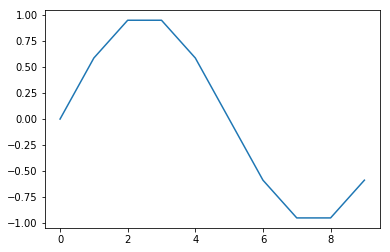

In [8]:
plt.plot(x_loop)

### 2. Implement DFT and IDFT Matrix Multiplication

In [9]:
def DFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(N)
    D = (l_w.reshape(-1,1))**np.arange(N)
    return D.dot(x)

In [10]:
def IDFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(0, -N, -1)
    D = (l_w.reshape(-1,1))**np.arange(N)/N
    return D.dot(x)

In [11]:
% time
dft_mat = DFT_mat(x)
x_mat = IDFT_mat(dft_mat)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 13.8 µs


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


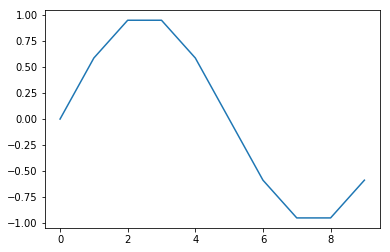

In [12]:
plt.plot(x_mat)

### Plot Computation time of 1 and 2

In [13]:
def make_x(N, f = 10):
    t = np.linspace(0, 1/f, N+1)[:-1]
    x = np.sin(2*np.pi*t*f)
    return x

In [14]:
def time_loop(f = 10):
    t = []
    for i in range(5, 25):
        x = make_x(i, f)
        start = time()
        temp = DFT_loop(x)
        end = time()
        t.append(end-start)
    return t

In [15]:
def time_mat(f = 10):
    t = []
    for i in range(5, 25):
        x = make_x(i, f)
        start = time()
        temp = DFT_mat(x)
        end = time()
        t.append(end-start)
    return t

In [16]:
t_loop = time_loop()
t_mat = time_mat()

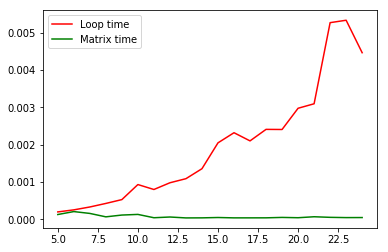

In [17]:
plt.plot(range(5, 25), t_loop, 'red')
plt.plot(range(5, 25), t_mat, 'green')
plt.legend(['Loop time', 'Matrix time'])